# Défintion et étude de l'étiquette : __Aires et Finesse des profils__
#### _Étude de profil d’aile d’avion par Machine Learning_ - _Université de Sherbrooke_
#### 
__Auteur__ : _Ilyas Baktache_  
__Année__ : 2022  

__Objectif__ : On cherche à integrer des données et paramètres aérodynamiques issus de l'étude du profil. Pour cela, on utilise __Xfoil__  (code disponible dans le module Xfoil) pour calculer les coefficients de portance et de trainée pour un nombre de Mach et de Reynolds donnée. Dans notre cas, on reste en subsonique.


## Librairies

In [96]:
# Librairies de traitement de données et tableau
import pandas as pd
import seaborn as snc
import numpy as np
import pickle

# On importe les données de pré-traitement
import os
import sys
# Cette ligne nous sert a importer plus facilement des classes dans les
# dossier parents
sys.path.append( os.path.dirname( os.path.dirname( os.path.abspath('airfoil_Optimisation_ML') ) ) )
from data.pre_processing import *

# Pour les messages d'erreur inutiles
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


On importe dans un premier temps la matrice qui regroupent les coordonnées des profils.

In [97]:
x,ally,nom_profil,marchepas = format.coordinate()
print("Pour des raisons divers, {} profils ne peuvent pas être utilisé dans notre etude.".format(len(marchepas)))
n = np.shape(ally)[1]
p = np.shape(ally)[0]

Pour des raisons divers, 10 profils ne peuvent pas être utilisé dans notre etude.
On obtient alors une matrice X de taille (118,1628)


## Étude des coefficients aérodynamique et de l'aire

Dans cette section, on cherche à établir la pertinence d'utiliser les paramètres L/D et l'air d'un profil. 

### Aire du profil
On calcule dans un premier temps l'aire gausienne de chaque profil:

In [98]:
aire = lb.air_profils(x,ally)

### Finesse 
Ensuite, on calcule la finesse pour un angle d'attaque nulle. On récupere dans un premier temps les fichiers de polaire sur le site airfoil.com pour un nombre de Mach nulle et des nombres de Reynolds qui varient entre 50000 et 100000

In [99]:
#le.allPolar(Re_list=[50000,100000,200000,500000,1000000],M_list=0)

On extraie alors les données de cL et cD

In [100]:
M = 0
Re_list=[50000,100000,200000,500000,1000000]
pas_alpha_all = []
# On note dans cette liste les finesses pour Alpha = 0, M = 0
# et différents Re
finesse_0 = np.zeros((len(nom_profil),len(Re_list)))
for j in range(len(Re_list)):
    Re = Re_list[j]
    pas_alpha_0 = []
    for i in range(len(nom_profil)):
        name = nom_profil[i]
        alpha,cL,cD,cDp,cM = utils.polarFile2list(name,M,Re)
        # Ici on choisit alpha = 0
        try :
            index_alpha_0 = alpha.index(0)
            cL = np.array(cL)
            cD = np.array(cD)
            finesse = cL/cD
            finesse_0[i,j] =finesse[index_alpha_0]
        except:
            pas_alpha_0.append(name)
    pas_alpha_all.append(pas_alpha_0)

On crée une fonction pour facilement enregistrer localement les données de Re. 

In [101]:
def save_Re_data(dict):
    mainFileName = utils.createMainFile('post_processed_data')
    Re = dict['reynoldsNumber']
    name = os.path.join(mainFileName,"Re_{}".format(Re))
    with open(name, "wb") as tf:
        pickle.dump(dict,tf)


On peut voir que certain profils n'ont pas de données de cL et cD pour alpha = 0 pour le nombre de Mach et le Re voulu; on les ignorent. Ainsi, pour chaque nombre de Reynolds etudié on trace la distribution conjointe de l'ensemble de données d'entraînement en utilisant l'air du profil et la finesse.

### Re = 50000

Text(0.5, 1.0, 'Re = 50000')

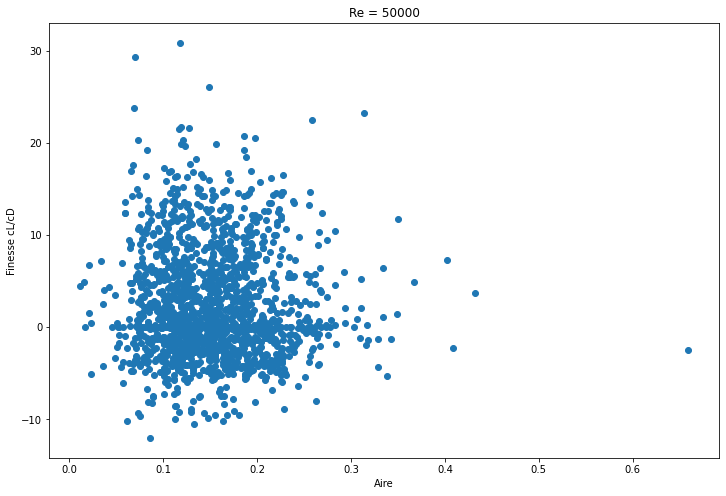

In [102]:
# Re = 50000
finesse_0_50000 = list(finesse_0[:,0])
nom_profil_50000 = nom_profil.copy()
aire_50000 = aire.copy()
pas_alpha_0 = pas_alpha_all[0]
for i in range(len(pas_alpha_0)):
    try :
        finesse_0_50000.remove(finesse_0_50000[nom_profil_50000.index(pas_alpha_0[i])])
        aire_50000.remove(aire_50000[nom_profil_50000.index(pas_alpha_0[i])])
        nom_profil_50000.remove(pas_alpha_0[i])
    except:
        pass

Re_50000 = {'aire' : aire_50000 ,
'finesse' : finesse_0_50000,
'nom': nom_profil_50000,
'reynoldsNumber' : 50000,
}
save_Re_data(Re_50000)
plt.figure(figsize = (12,8))
plt.scatter(aire_50000,finesse_0_50000)
plt.ylabel('Finesse cL/cD')
plt.xlabel('Aire')
plt.title('Re = 50000')

### Re = 100000

Text(0.5, 1.0, 'Re = 100000')

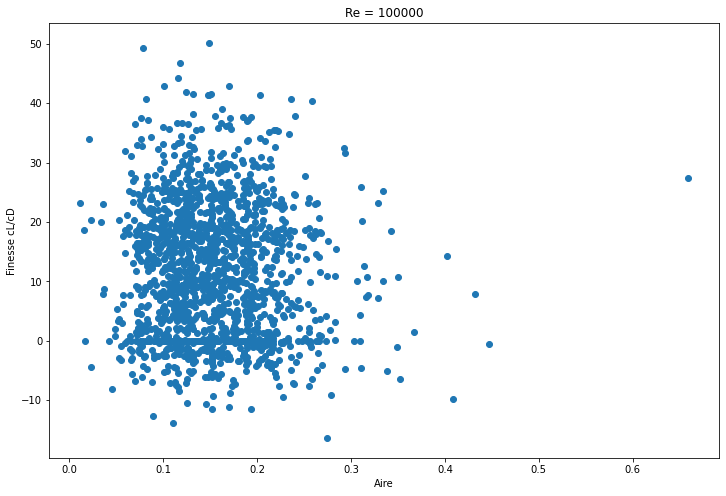

In [103]:
## Re = 100000
finesse_0_100000 = list(finesse_0[:,1])
nom_profil_100000 = nom_profil.copy()
aire_100000 = aire.copy()
pas_alpha_0 = pas_alpha_all[1]
for i in range(len(pas_alpha_0)):
    try:
        finesse_0_100000.remove(finesse_0_100000[nom_profil_100000.index(pas_alpha_0[i])])
        aire_100000.remove(aire_100000[nom_profil_100000.index(pas_alpha_0[i])])
        nom_profil_100000.remove(pas_alpha_0[i])
    except:
        pass

Re_100000 = {'aire' : aire_100000 ,
'finesse' : finesse_0_100000,
'nom': nom_profil_100000,
'reynoldsNumber' : 100000,
}
save_Re_data(Re_100000)
plt.figure(figsize = (12,8))
plt.scatter(aire_100000,finesse_0_100000)
plt.ylabel('Finesse cL/cD')
plt.xlabel('Aire')
plt.title('Re = 100000')

### Re = 200000

Text(0.5, 1.0, 'Re = 200000')

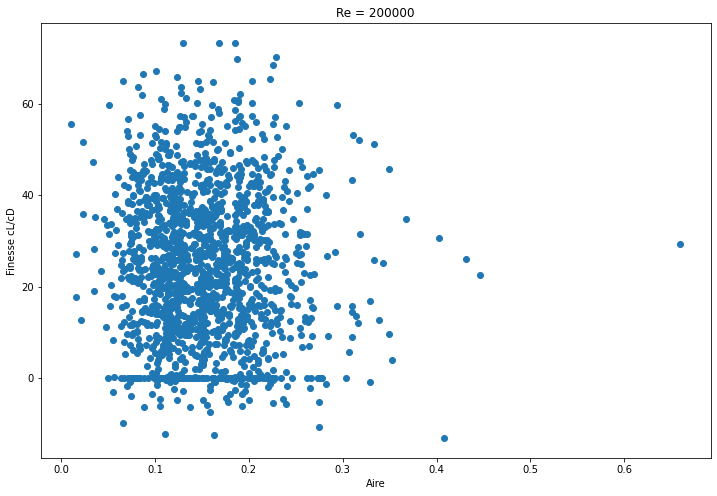

In [104]:
# Re = 200000
finesse_0_200000 = list(finesse_0[:,2])
nom_profil_200000 = nom_profil.copy()
aire_200000 = aire.copy()
pas_alpha_0 = pas_alpha_all[2]
for i in range(len(pas_alpha_0)):
    try:
        finesse_0_200000.remove(finesse_0_200000[nom_profil_200000.index(pas_alpha_0[i])])
        aire_200000.remove(aire_200000[nom_profil_200000.index(pas_alpha_0[i])])
        nom_profil_200000.remove(pas_alpha_0[i])
    except:
        pass

Re_200000 = {'aire' : aire_200000 ,
'finesse' : finesse_0_200000,
'nom': nom_profil_200000,
'reynoldsNumber' : 200000,
}
save_Re_data(Re_200000)
plt.figure(figsize = (12,8))
plt.scatter(aire_200000,finesse_0_200000)
plt.ylabel('Finesse cL/cD')
plt.xlabel('Aire')
plt.title('Re = 200000')

### Re = 500000

Text(0.5, 1.0, 'Re = 500000')

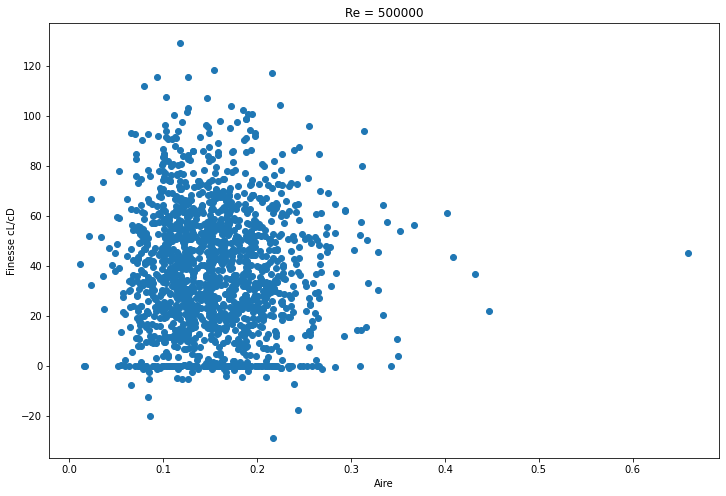

In [105]:
# Re = 500000
finesse_0_500000 = list(finesse_0[:,3])
nom_profil_500000 = nom_profil.copy()
aire_500000 = aire.copy()
pas_alpha_0 = pas_alpha_all[3]
for i in range(len(pas_alpha_0)):
    try:
        finesse_0_500000.remove(finesse_0_500000[nom_profil_500000.index(pas_alpha_0[i])])
        aire_500000.remove(aire_500000[nom_profil_500000.index(pas_alpha_0[i])])
        nom_profil_500000.remove(pas_alpha_0[i])
    except:
        pass

Re_500000 = {'aire' : aire_500000 ,
'finesse' : finesse_0_500000,
'nom': nom_profil_500000,
'reynoldsNumber' : 500000,
}
save_Re_data(Re_500000)
plt.figure(figsize = (12,8))
plt.scatter(aire_500000,finesse_0_500000)
plt.ylabel('Finesse cL/cD')
plt.xlabel('Aire')
plt.title('Re = 500000')



### Re = 1000000

Text(0.5, 1.0, 'Re = 1000000')

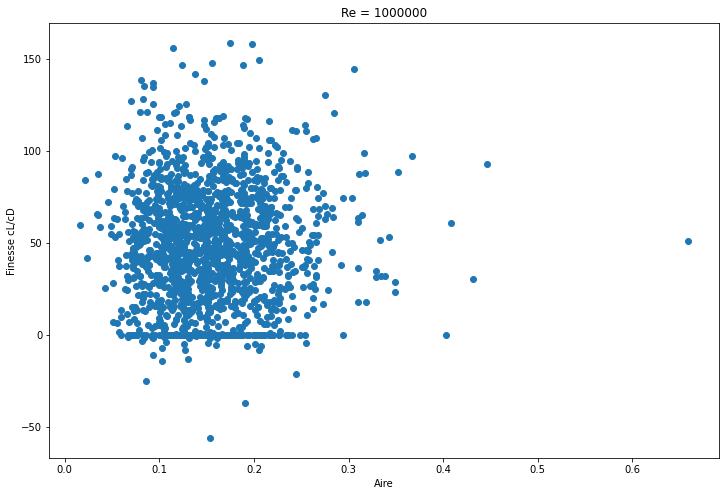

In [106]:
# Re = 1000000
finesse_0_1000000 = list(finesse_0[:,4])
nom_profil_1000000 = nom_profil.copy()
aire_1000000 = aire.copy()
pas_alpha_0 = pas_alpha_all[4]
for i in range(len(pas_alpha_0)):
    try:
        finesse_0_1000000.remove(finesse_0_1000000[nom_profil_1000000.index(pas_alpha_0[i])])
        aire_1000000.remove(aire_1000000[nom_profil_1000000.index(pas_alpha_0[i])])
        nom_profil_1000000.remove(pas_alpha_0[i])
    except:
        pass

Re_1000000 = {'aire' : aire_1000000 ,
'finesse' : finesse_0_1000000,
'nom': nom_profil_1000000,
'reynoldsNumber' : 1000000,
}
save_Re_data(Re_1000000)

plt.figure(figsize = (12,8))
plt.scatter(aire_1000000,finesse_0_1000000)
plt.ylabel('Finesse cL/cD')
plt.xlabel('Aire')
plt.title('Re = 1000000')



In [107]:
indice = Re_1000000['nom'].index('goe458-il')

print(round(Re_1000000['aire'][indice],5),round(
Re_1000000['finesse'][indice],4))

0.09419 60.9475


In [108]:
np.min(aire_1000000),np.max(aire_1000000)

(0.015744390362822994, 0.659407882885024)

On peut voir l'évolution du la courbes Aire/Finesse en fonction du nombre de Reynolds. La finesse augmente avec le nombre de Reynolds pour la majorité des profils. De plus, la distribution de finesse est plus etendu. Ainsi, l'ecart type de l'échantillon augmente grandement avec le nombre de Reynolds.

### Distribution de densité d'air de finesse

On regarde la distribution de densité de l'aire et de la finesse en fonction du nombre de Reynolds. L'aire des profils ne variant pas. On s'interesse principalement à la variation de la finesse.

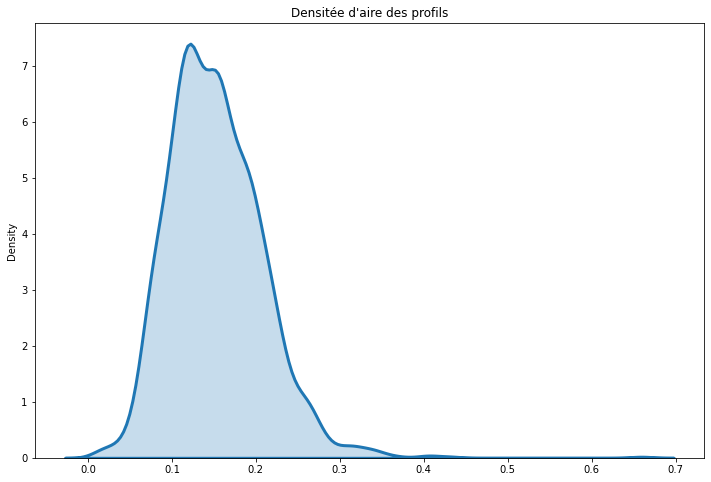

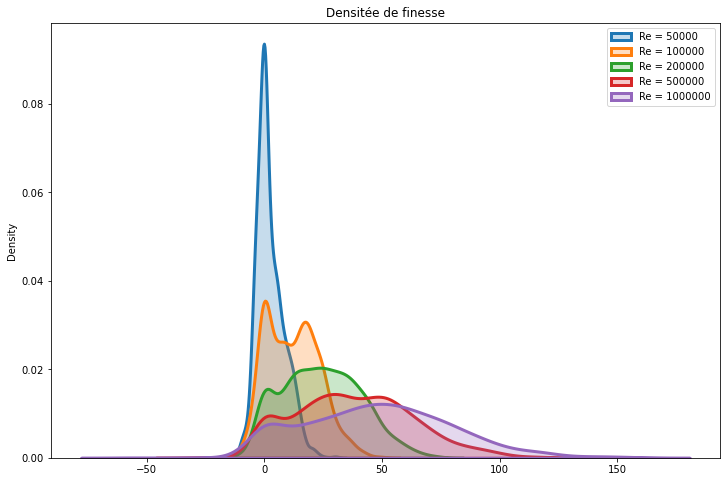

In [109]:
plt.figure(figsize = (12,8))
plt.title("Densitée d'aire des profils")
snc.distplot(aire_50000, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})


plt.figure(figsize = (12,8))
plt.title("Densitée de finesse")
snc.distplot(finesse_0_50000, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 'Re = 50000')
snc.distplot(finesse_0_100000, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 'Re = 100000')
snc.distplot(finesse_0_200000, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 'Re = 200000')
snc.distplot(finesse_0_500000, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 'Re = 500000')
snc.distplot(finesse_0_1000000, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 'Re = 1000000')
plt.legend()

On peut voir que plus le nombre de reynolds est élevé plus la finesse augmente comme attendu. Ce qui est interessant à noter et que la distribution de densité des finesse devient plus étendu avec Re. Ainsi, pour des nombres de Reynolds élevé le choix d'un profil peut donner des finesses très différentes alors que pour des Re faible cette diférence est moindre

On peut également comparer les courbes obtenus à celle obtenu en projetant les données du profils sur les deux premières composantes principales de la reduction  dimensionnnelle. Pour cela il nous faut concorder les données sur les deux courbes. Pour cela on map les données par rapport au max et min des deux composantes dimensionelles.

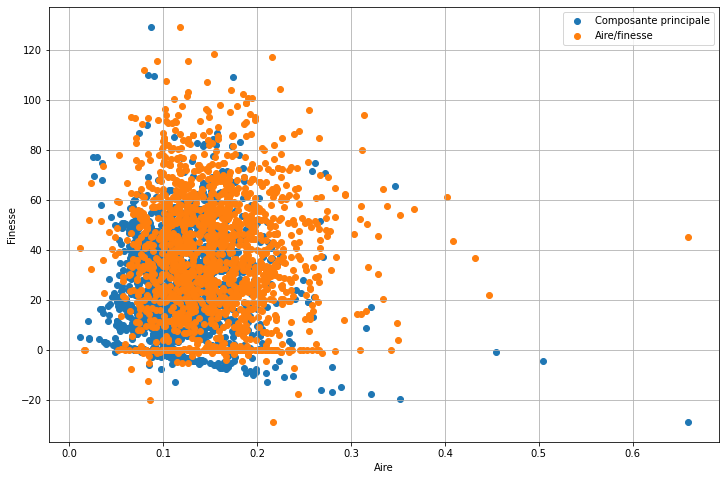

In [110]:
reduced_data = decomposition.PCA(n_components=2).fit_transform(ally.T) 

def normal(x,i0,i1,j0,j1):
    L = (j0-j1)/(i0-i1)
    return np.add(j0-L*i0,np.multiply(x,L))

normal_pc1 = normal(reduced_data[:,0],min(reduced_data[:,0]),max(reduced_data[:,0]),min(aire_500000),max(aire_500000))
normal_pc2 =  normal(reduced_data[:,1],min(reduced_data[:,1]),max(reduced_data[:,1]),min(finesse_0_500000),max(finesse_0_500000))

plt.figure(figsize=(12,8))
plt.scatter(normal_pc1,normal_pc2,label = 'Composante principale')
plt.scatter(aire_500000,finesse_0_500000,label = 'Aire/finesse')
plt.xlabel("Aire")
plt.ylabel("Finesse")
plt.legend()
plt.grid()
plt.show()


On peut voir que les données sont très proche. On peut voir que les données dans la base des composantes principale semblent subir une rotation et une legère translation vectorielle. On cherche donc à determiner la matrice de rotation nous permettant d'obtenir une meilleurs approximation des données d'aire de finesse avec les composantes principales.

## Transformation des résulats (Correlation Aire/Finesse et Composante principale PC1/PC2)


Dans le but d'améliorer d'allier simplicité, économie et précision, on cherche à rapprocher les résultats issus de la réduction dimensionnelle avec ceux obtenus avec Xfoil (finesse). Les deux résultats semblent relativement proche à une rotation près. On pense alors à faire un changement de repère. Les principales opérations qui caractérisent un changement de repère:
* La rotation avec une matrice de rotation.
* La translation.
* Le changement d'échelle.

On défnit alors un protocole pour le changement de repère:
1. <ins>Orthonomaliser et uniformiser les deux sets de données</ins>

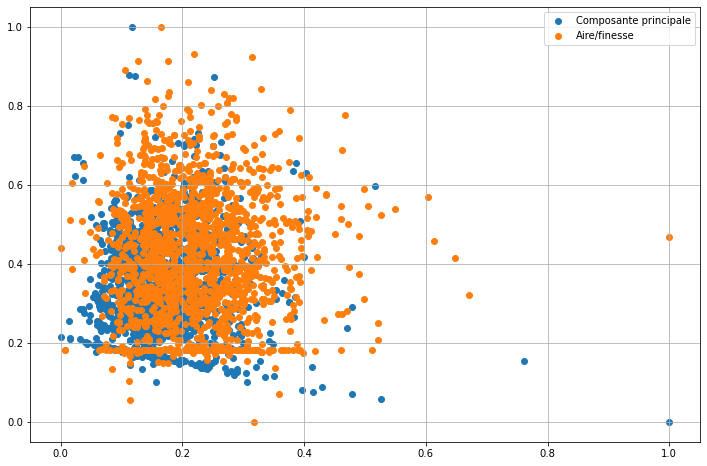

In [111]:
# Orthonomalisation
normal_pc1 = list(normal(reduced_data[:,0],min(reduced_data[:,0]),max(reduced_data[:,0]),0,1))
normal_pc2 =  list(normal(reduced_data[:,1],min(reduced_data[:,1]),max(reduced_data[:,1]),0,1))

normal_aire = list(normal(aire_500000,min(aire_500000),max(aire_500000),0,1))
normal_finesse = list(normal(finesse_0_500000,min(finesse_0_500000),max(finesse_0_500000),0,1))

# Uniformisation des données
nom_profil_temp = nom_profil.copy()
i = 0
for _ in range(len(nom_profil_500000)):
    if nom_profil_temp[i] != nom_profil_500000[i]:
        nom_profil_temp.remove(nom_profil_temp[i])
        del normal_pc1[i]
        del normal_pc2[i]
    i+=1

plt.figure(figsize=(12,8))
plt.scatter(normal_pc1,normal_pc2,label = 'Composante principale')
plt.scatter(normal_aire,normal_finesse,label = 'Aire/finesse')
plt.legend()
plt.grid()
plt.show()


2. <ins>Déterminer le centre de masse des deux distribution </ins>

In [112]:
mean_pc1 = np.mean(normal_pc1)
mean_pc2 = np.mean(normal_pc2)

mean_aire_500000 = np.mean(normal_aire)
mean_finesse_0_500000 = np.mean(normal_finesse)

normal_aire_mean = [normal_aire[i] -mean_aire_500000 for i in range(len(normal_aire))]
normal_finesse_mean =  [normal_finesse[i] -mean_finesse_0_500000 for i in range(len(normal_finesse))]
print("Le centre de gravité des profils projetées sur les deux composantes principaeles est ({},{})".format(round(mean_pc1,5),round(mean_pc2,5)))
print("Le centre de gravité de la distribution d'aire et de finesse de tous les profils: est ({},{})".format(round(mean_aire_500000,5),round(mean_finesse_0_500000,5)))


Le centre de gravité des profils projetées sur les deux composantes principaeles est (0.16609,0.34046)
Le centre de gravité de la distribution d'aire et de finesse de tous les profils: est (0.21969,0.42254)


3. <ins>Définir un repère pour les deux distributions avec comme origine le centre de masse </ins>

Pour définir le repère des composante principale de la réduction dimensionnelle, on s'interesse à la droite décroissante qui va définir un repère directeur du repère:

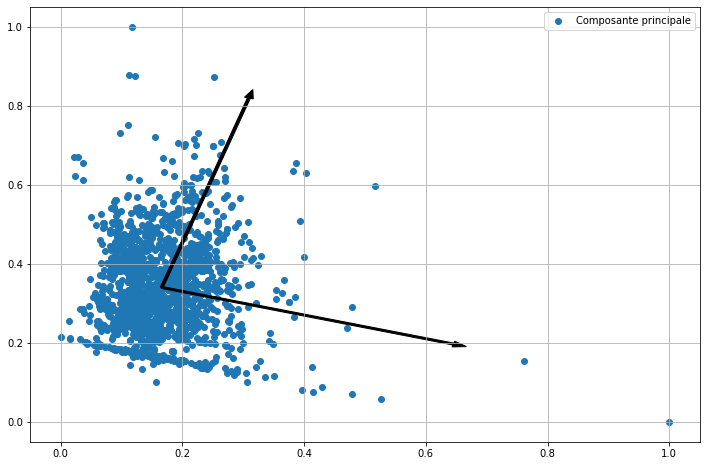

In [113]:
# Transforme les array en list pour les manipuler plus facilement
normal_pc1 = list(normal_pc1)
normal_pc2 = list(normal_pc2)

# Recherche de l'indice du point en amont de la droite
indice1 = normal_pc1.index(np.min(normal_pc1))

# Recherche de l'indice du point en aval de la droite
normal_pc2_prime = list(normal_pc2).copy()
normal_pc2_prime.remove(min(normal_pc2_prime))
indice2 = normal_pc2_prime.index(np.min(normal_pc2_prime))

# Définition des coordonnées
x1_angle = normal_pc1[indice1]
y1_angle = normal_pc2[indice1]

x2_angle = normal_pc1[indice2]
y2_angle = normal_pc2_prime[indice2]

# Calcule des paramètres de la droite
a = (y1_angle-y2_angle)/(x1_angle-x2_angle)
b = y1_angle - a*x1_angle

# On verfie visuellement si notre approximation est bonne
x = np.linspace(0,0.35,100)
plt.figure(figsize=(12,8))
plt.scatter(normal_pc1,normal_pc2,label = 'Composante principale')
#plt.plot(x,a*x+b,c='r')
plt.legend()
plt.grid()

# Calcule des coordonnées du vecteur u et v
vec_i  = np.array([x2_angle-x1_angle,y2_angle-y1_angle])
vec_i = vec_i/lin.norm(vec_i)

d = 1/(np.sqrt((vec_i[1]/vec_i[0])**2+1))
c = -(vec_i[1]*d)/vec_i[0]
vec_j = np.array([c,d])

# Plot les vecteurs
plt.arrow(mean_pc1, mean_pc2, 1/2*vec_i[0],1/2*vec_i[1], width = 0.005, color = 'k')
plt.arrow(mean_pc1, mean_pc2, 1/2*vec_j[0],1/2*vec_j[1], width = 0.005,  color = 'k')

On s'interesse maintenant au repère (Air,Finesse) avec la "droite" à finesse = 0 comme vecteur directeur du repère:

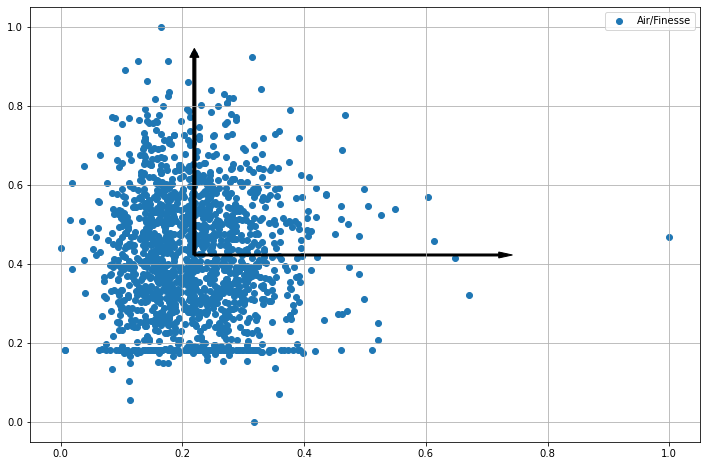

In [114]:
# Transforme les array en list pour les manipuler plus facilement
normal_aire = list(normal_aire)
normal_finesse = list(normal_finesse)

# Recherche de l'indice du point en amont de la droite et 
# du point en aval de la droite
def find_index_point2():
    list_finess_0 = np.where(np.array(normal_finesse)== 0)[0]
    min_air = 0
    max_air = 0
    for i in list_finess_0:
        if normal_aire[i]>=normal_aire[max_air]:
            max_air = i
        if normal_aire[i]<=normal_aire[min_air]:
            min_air = i
    return min_air,max_air

indice1 ,indice2 = find_index_point2()

# Définition des coordonnées
x12_angle = normal_aire[indice1]
y12_angle = normal_finesse[indice1]

x22_angle = normal_aire[indice2]
y22_angle = normal_finesse[indice2]

# Calcule des paramètres de la droite
a_1 = (y12_angle-y22_angle)/(x12_angle-x22_angle)
b_1 = y12_angle - a_1*x12_angle


# On verfie visuellement si notre approximation est bonne
plt.figure(figsize=(12,8))
plt.scatter(normal_aire,normal_finesse,label = 'Air/Finesse')
#x = np.linspace(0,0.35,100)
#plt.plot(x,a_1*x+b_1,c='r')

# Calcule des coordonnées du vecteur u et v
vec_u  = np.array([1,0])
vec_v  = np.array([0,1])

plt.arrow(mean_aire_500000, mean_finesse_0_500000, 1/2*vec_u[0],1/2*vec_u[1], width = 0.005,color = 'k')
plt.arrow(mean_aire_500000, mean_finesse_0_500000, 1/2*vec_v[0],1/2*vec_v[1], width = 0.005,color = 'k')

plt.legend()
plt.grid()


4. <ins>Faire les mutiples changement de repères </ins>

Pour le changement de repère, on part du repère initial (0) qu'on note (O,$\vec{u}$,$\vec{v}$) vers le repère (PC1,PC2) qu'on note ($C_{G1}$,$\vec{i}$,$\vec{j}$). On sait alors que un point P définis par ses coordonnées (x,y) dans le repère (O,$\vec{u}$,$\vec{v}$), ses coordonnées dans le repère  ($C_{G1}$,$\vec{i}$,$\vec{j}$) sont notés (X,Y):
$$
\begin{bmatrix}
X\\
Y
\end{bmatrix} = \left(\begin{bmatrix}
a & c\\ 
b & d
\end{bmatrix}\right)\left( \begin{bmatrix}
x\\
y
\end{bmatrix} - \begin{bmatrix}
x_{Cg1}\\
y_{Cg1}
\end{bmatrix} \right)
$$

Avec:
* ($x_{Cg1}$,$y_{Cg1}$) les coordonnées du centre de gravité de la distribution de profils sur (PC1,PC2) dans le repère (O,$\vec{u}$,$\vec{v}$)
* Les valeurs a,b,c,d sont les composantes des vecteurs $\vec{i}$ et $\vec{j}$ dans le repère ($\vec{u}$,$\vec{v}$) tel que:
$$
\begin{cases}
\vec{i} = \cos(\alpha)\ \vec{u} - \sin(\alpha)\ \vec{v} \\
\vec{j} = \sin(\alpha)\ \vec{u} + \cos(\alpha)\ \vec{v}
\end{cases}
$$

Une méthode possible pour obtenir avec précision l'expression des vecteurs $\vec{u}$ et $\vec{v}$ dans la base (O,$\vec{i}$,$\vec{j}$) est de déterminer l'angle entre les vecteurs $\vec{u}$ et $\vec{i}$. Or comme on a le coefficient directeur de la droite qui est dirigé par $\vec{i}$:



In [115]:
alpha = -np.arctan(a)
print("L'angle entre les deux vecteurs est {}°".format(round(np.rad2deg(alpha),2)))

L'angle entre les deux vecteurs est 16.64°


Ainsi, on a une expression de la matrice qui devient simplement une matrice de rotation:
$$
\begin{bmatrix}
\cos{\alpha} & -\sin{\alpha}\\ 
\sin{\alpha} & \cos{\alpha}
\end{bmatrix}
$$



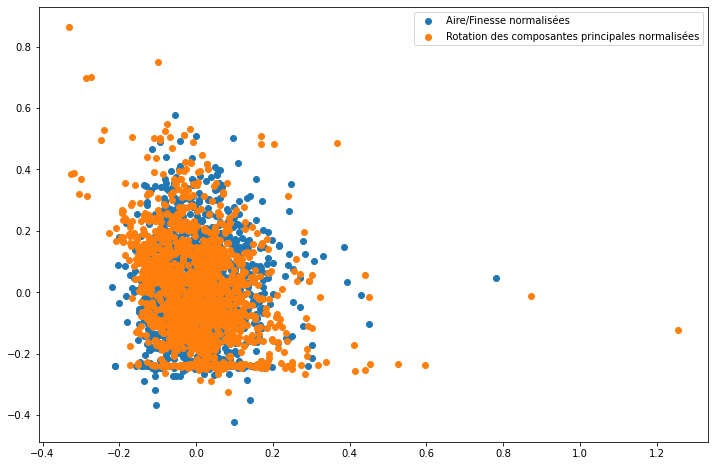

In [116]:
R  = np.matrix([[np.cos(alpha),-np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
PC_1 = []
PC_2 = []
for i in range(len(normal_pc1)):
    PC_1.append(normal_pc1[i]- mean_pc1) 
    PC_2.append(normal_pc2[i]-mean_pc2) 
PC = np.matrix([PC_1,PC_2])

PC_rotated = np.matmul(R,PC)
PC_rotated_1 = []
PC_rotated_2 = []
for i in range(np.shape(PC_rotated)[1]):
    PC_rotated_1.append(PC_rotated[0,i]) 
    PC_rotated_2.append(PC_rotated[1,i]) 

# Msie à l'echelle 
PC_rotated_1 = np.multiply(PC_rotated_1,1.4)
PC_rotated_2 = np.multiply(PC_rotated_2,1.4)


plt.figure(figsize=(12,8))
#plt.scatter(normal_pc1,normal_pc2, label ='Composantes principales normalisées')
plt.scatter(normal_aire_mean,normal_finesse_mean, label ='Aire/Finesse normalisées')
plt.scatter(PC_rotated_1, PC_rotated_2,label ='Rotation des composantes principales normalisées')
plt.legend()
plt.show()



On peut voir que la rotation a bien été effectué et que le centrage autour du point de masse aussi. Afin d'approximer au mieux les deux distribution on réalise également une mise à l'échelle (*1.4). Les deux distribution sont relativement proche à l'aide de toutes ces opérations. Malgrès le fait que les deux distribtions sont loin d'être identique, cette approximation reste très bonne du fait de la facilité et de la rapidité de cette methode;

### Pour les autres nombres de Reynolds

Afin d'augmenter la portée de notre étude, il est interessant de voir si avec la méthodologie ci-dessus il est possible de se rapprocher d'autres distribution issus de données recueillis pour d'autres nombres de Reynolds.

Ainsi avec la même méthode pour Re = 1000000



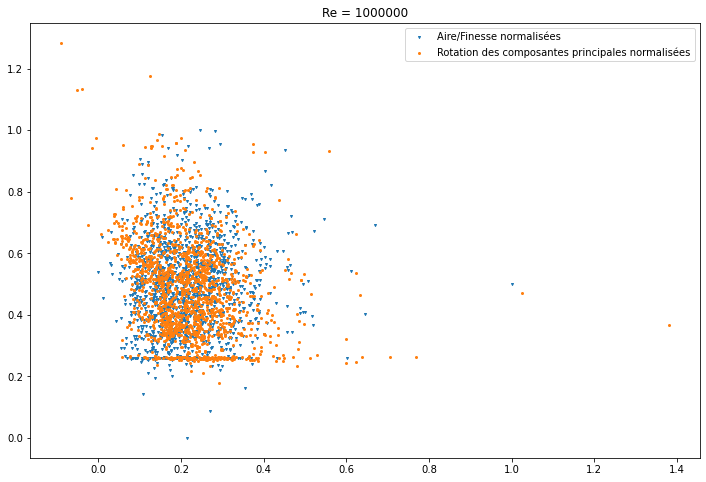

In [117]:
def corrPC_Aire_Finesse(Re,echelle,Plot=False):

    aire  = Re['aire']
    finesse =  Re['finesse']
    nom_profil_1 = Re['nom']
    reynoldsNumber = Re['reynoldsNumber']
    '''
    1. Orthonormalisation et Uniformisation des données de profils
    '''
    # Définition des listes avec la distribution points PC
    reduced_data = decomposition.PCA(n_components=2).fit_transform(ally.T) 
    normal_pc1 = list(normal(reduced_data[:,0],min(reduced_data[:,0]),max(reduced_data[:,0]),0,1))
    normal_pc2 =  list(normal(reduced_data[:,1],min(reduced_data[:,1]),max(reduced_data[:,1]),0,1))
    # Définition du centre de masse PC
    mean_pc1 = np.mean(normal_pc1)
    mean_pc2 = np.mean(normal_pc2)

    # Définition des listes avec la distribution points Aire/Finesse
    normal_aire = list(normal(aire,min(aire),max(aire),0,1))
    normal_finesse = list(normal(finesse,min(finesse),max(finesse),0,1))
    # Définition du centre de masse PC
    mean_aire = np.mean(normal_aire)
    mean_finesse_0 = np.mean(normal_finesse)

    normal_aire_mean = [normal_aire[i] -mean_aire for i in range(len(normal_aire))]
    normal_finesse_mean =  [normal_finesse[i] -mean_finesse_0 for i in range(len(normal_finesse))]

    nom_profil_temp = nom_profil.copy()
    i = 0
    for _ in range(len(nom_profil_1)):
        if nom_profil_temp[i] != nom_profil_1[i]:
            nom_profil_temp.remove(nom_profil_temp[i])
            del normal_pc1[i]
            del normal_pc2[i]
        i+=1

    '''
    2. Définition de la base des repères
    '''
    # Recherche de l'indice du point en amont de la droite
    indice1 = normal_pc1.index(np.min(normal_pc1))

    # Recherche de l'indice du point en aval de la droite
    normal_pc2_prime = list(normal_pc2).copy()
    normal_pc2_prime.remove(min(normal_pc2_prime))
    indice2 = normal_pc2_prime.index(np.min(normal_pc2_prime))

    # Définition des coordonnées
    x1_angle = normal_pc1[indice1]
    y1_angle = normal_pc2[indice1]

    x2_angle = normal_pc1[indice2]
    y2_angle = normal_pc2_prime[indice2]

    # Calcule des paramètres de la droite
    a = (y1_angle-y2_angle)/(x1_angle-x2_angle)
    b = y1_angle - a*x1_angle

    # Calcule des coordonnées du vecteur u et v
    vec_i  = np.array([x2_angle-x1_angle,y2_angle-y1_angle])
    vec_i = vec_i/lin.norm(vec_i)

    d = 1/(np.sqrt((vec_i[1]/vec_i[0])**2+1))
    c = -(vec_i[1]*d)/vec_i[0]
    vec_j = np.array([c,d])

    # Recherche de l'indice du point en amont de la droite et 
    # du point en aval de la droite
    def find_index_point2():
        list_finess_0 = np.where(np.array(normal_finesse_mean)== 0)[0]
        min_air = 0
        max_air = 0
        for i in list_finess_0:
            if normal_aire_mean[i]>=normal_aire_mean[max_air]:
                max_air = i
            if normal_aire_mean[i]<=normal_aire_mean[min_air]:
                min_air = i
        return min_air,max_air

    indice1 ,indice2 = find_index_point2()

    # Définition des coordonnées
    x12_angle = normal_aire_mean[indice1]
    y12_angle = normal_finesse_mean[indice1]

    x22_angle = normal_aire_mean[indice2]
    y22_angle = normal_finesse_mean[indice2]

    # Calcule des paramètres de la droite
    a_1 = (y12_angle-y22_angle)/(x12_angle-x22_angle)
    b_1 = y12_angle - a_1*x12_angle

    '''
    3. Changement de repère
    '''
    alpha = -np.arctan(a)
    R  = np.matrix([[np.cos(alpha),-np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
    PC_1 = []
    PC_2 = []
    for i in range(len(normal_pc1)):
        PC_1.append(normal_pc1[i]- mean_pc1) 
        PC_2.append(normal_pc2[i]-mean_pc2) 
    PC = np.matrix([PC_1,PC_2])

    PC_rotated = np.matmul(R,PC)
    PC_rotated_1 = []
    PC_rotated_2 = []
    for i in range(np.shape(PC_rotated)[1]):
        PC_rotated_1.append(PC_rotated[0,i]) 
        PC_rotated_2.append(PC_rotated[1,i]) 

    # Msie à l'echelle 
    PC_rotated_1 = np.multiply(PC_rotated_1,echelle)
    PC_rotated_2 = np.multiply(PC_rotated_2,echelle)

    pc1_rotated = []
    pc2_rotated = []
    for i in range(len(PC_rotated_1)):
        pc1_rotated.append(PC_rotated_1[i] + mean_aire) 
        pc2_rotated.append(PC_rotated_2[i] + mean_finesse_0) 

    if Plot:
        plt.figure(figsize=(12,8))
        #plt.scatter(normal_pc1,normal_pc2, label ='Composantes principales normalisées')
        plt.scatter(normal_aire,normal_finesse, label ='Aire/Finesse normalisées',marker = 'v',s = 4)
        plt.scatter(pc1_rotated, pc2_rotated,label ='Rotation des composantes principales normalisées',s=4)
        plt.title("Re = {}".format(reynoldsNumber))
        plt.legend()

    return pc1_rotated, pc2_rotated
    
pc1_rotated, pc2_rotated = corrPC_Aire_Finesse(Re_1000000,1.3,Plot=True)

On a essayé de quantifier l'erreur entre les deux sets de données. Cependant à cause de la présence de données qui sont très eloignée cela fausse un peu l'erreur obtenu. On décide alors de se fier à la representation graphique pour definir la bonne echelle. 

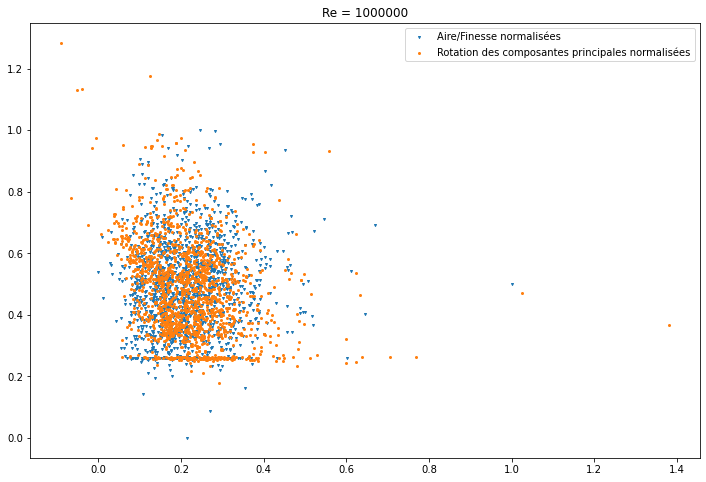

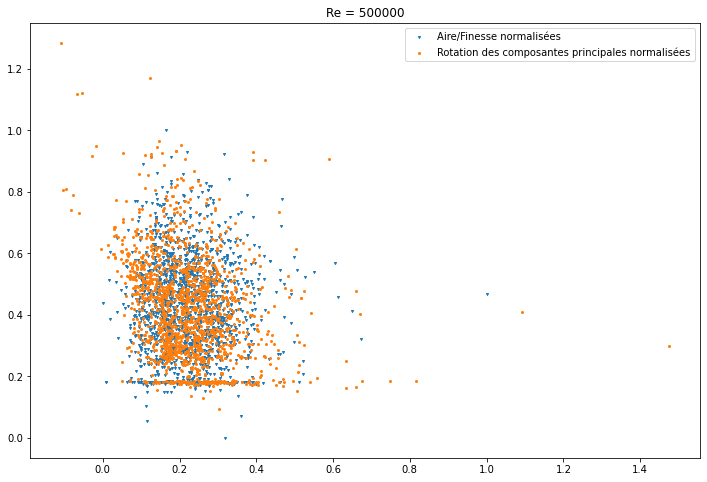

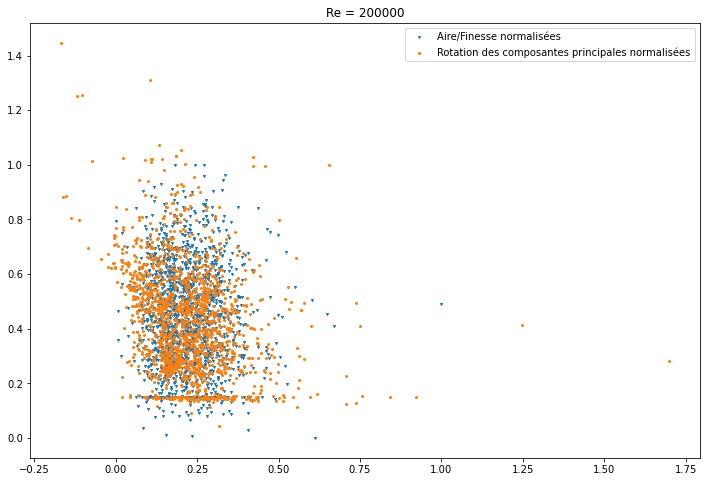

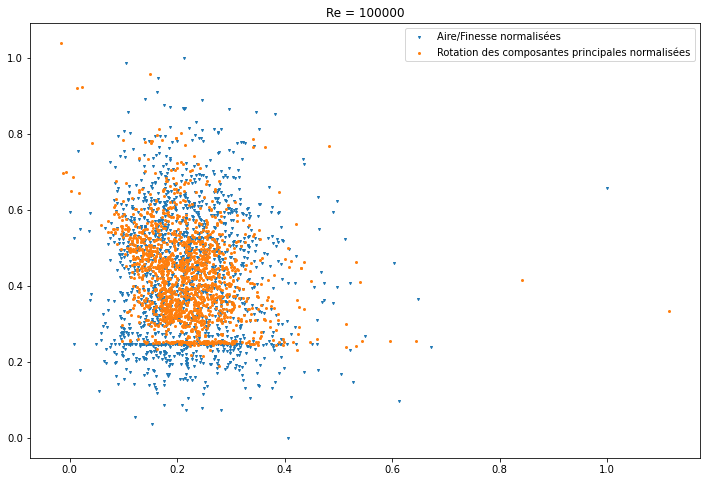

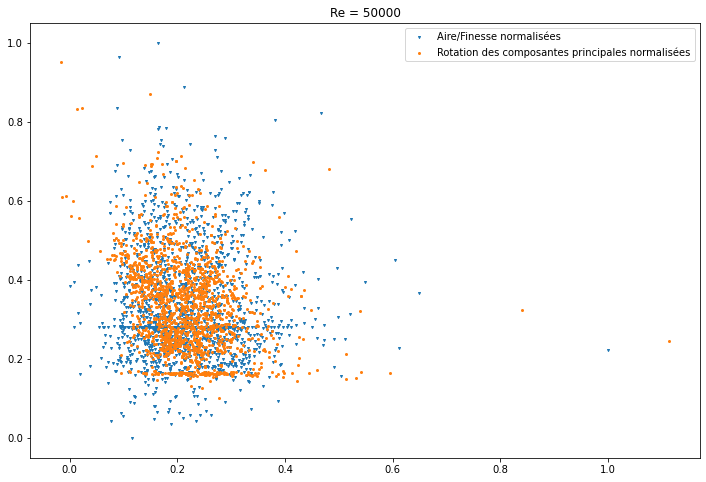

In [118]:
pc1_rotated_1000000, pc2_rotated_1000000 = corrPC_Aire_Finesse(Re_1000000,1.3,Plot=True)
pc1_rotated_500000, pc2_rotated_500000 = corrPC_Aire_Finesse(Re_500000,1.4,Plot=True)
pc1_rotated_200000, pc2_rotated_200000 = corrPC_Aire_Finesse(Re_200000,1.65,Plot=True)
pc1_rotated_100000, pc2_rotated_100000 = corrPC_Aire_Finesse(Re_100000,1,Plot=True)
pc1_rotated_50000, pc2_rotated_50000 = corrPC_Aire_Finesse(Re_50000,1,Plot=True)

Comme dit précedemment, cette méthode est pertinente uniquement pour des nombres de Reynolds élevé

## Définition d'un score pour le discriminateur

Maintenant qu'on a réussit à approximer les resultats de finesse et d'aire avec une réduction dimensionnelle, il nous faut définir un score pour noter les performances (finesse/Aire) d'un profil sur la carte des composantes principales:

In [119]:
def score_wanted(Re,aire_wanted,finesse_wanted,pourcentage = False):
    '''
    Retourne le score voulue
    '''

    aire  = Re['aire']
    finesse =  Re['finesse']
    
    aire_wanted_normal = normal(aire_wanted,min(aire),max(aire),0,1)
    finesse_wanted_normal = normal(finesse_wanted,min(finesse),max(finesse),0,1)

    score = np.sqrt(aire_wanted_normal**2 + finesse_wanted_normal**2)
    if pourcentage:
        score*=100

    return score

aire_wanted = 0.2
finesse_wanted = 40
Re = Re_1000000

score_wanted(Re,aire_wanted,finesse_wanted)

0.5307408354298288

La fonction ci-dessus permet d'obtenir un score à partir des données d'aire et finesse désirée.

On developpe une fonction ci-dessous pour afficher le score d'un profils selon deux critères:
* Les données issus de Xfoil pour la finesse
* Les données issus de la réduction dimensionnelle

In [120]:
def score_profil_PC(name,Re):
    '''
    Retourne le score d'un profil à partir des données 
    de la reduction dimensionnelle
    '''
    nom_du_profil = Re['nom']

    if name in nom_du_profil:
        index_nom = nom_profil.index(name)

        # Définition et normalisation des deux composantes 
        # principales de la reduction dimensionelle
        reduced_data = decomposition.PCA(n_components=2).fit_transform(ally.T) 
        normal_pc1 = list(normal(reduced_data[:,0],min(reduced_data[:,0]),max(reduced_data[:,0]),0,1))
        normal_pc2 =  list(normal(reduced_data[:,1],min(reduced_data[:,1]),max(reduced_data[:,1]),0,1))

        score = np.sqrt((normal_pc1[index_nom])**2 + (normal_pc2[index_nom])**2)
        return score
    else :
        lg.debug("Le profil demandée n'a pas de données suffisante pour ce nombre de Reynolds")

def score_profil_AF(name,Re):
    '''
    Retourne le score d'un profil à partir des données Aire/Finesse
    '''


    nom_du_profil = Re['nom']

    if name in nom_du_profil:
        index_nom = nom_profil.index(name)

        # Défintion et normalisation du repère Aire/Finesse
        aire  = Re['aire']
        finesse =  Re['finesse']
        aire_normal = normal(aire,min(aire),max(aire),0,1)
        finesse_normal = normal(finesse,min(finesse),max(finesse),0,1)

        score = np.sqrt((aire_normal[index_nom])**2 + (finesse_normal[index_nom])**2)
        return score
    else :
        lg.debug("Le profil demandée n'a pas de données suffisante pour ce nombre de Reynolds")


On compare les deux scores pour tous les profils:

L'ecart moyen entre les deux scores est 0.1908. Avec un ecart minimale de 0.0003 et maximale de 0.7186 


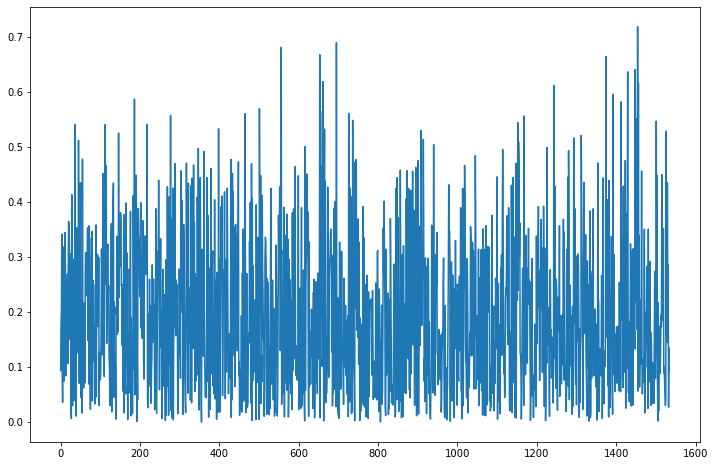

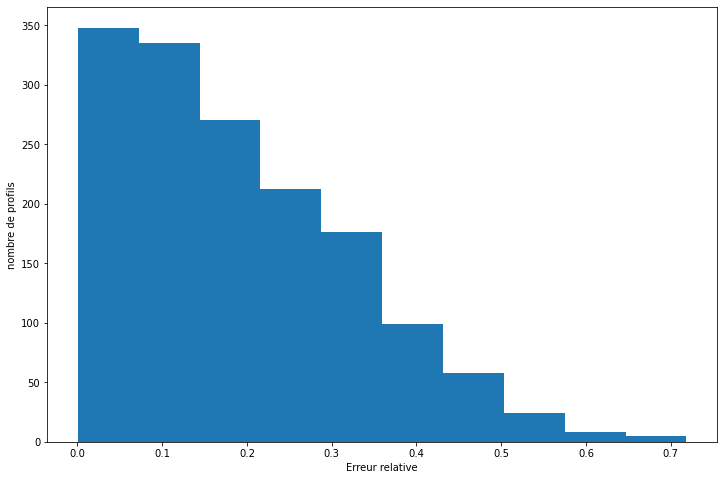

In [121]:
Re = Re_1000000
erreur_relative = []
for name in nom_profil:
    try: 
        erreur_relative.append((np.abs(score_profil_AF(name,Re)-score_profil_PC(name,Re))))
    except:
        pass
    
plt.figure(figsize=(12,8))
plt.plot(erreur_relative)
plt.figure(figsize=(12,8))
plt.xlabel("Erreur relative")
plt.ylabel("nombre de profils")
plt.hist(erreur_relative)

print("L'ecart moyen entre les deux scores est {}. Avec un ecart minimale de {} et maximale de {} ".format(round(np.mean(erreur_relative),4),round(np.min(erreur_relative),4),round(np.max(erreur_relative),4)))


Comme on peut le voir, l'écart moyen de score est autour de 20%. On retrouve environ 200 profils au dessus d'un ecart de 35%. Ainsi, pour garantir un fonctionnement stable et pertinent de notre discriminateur, on définit 9 zones:


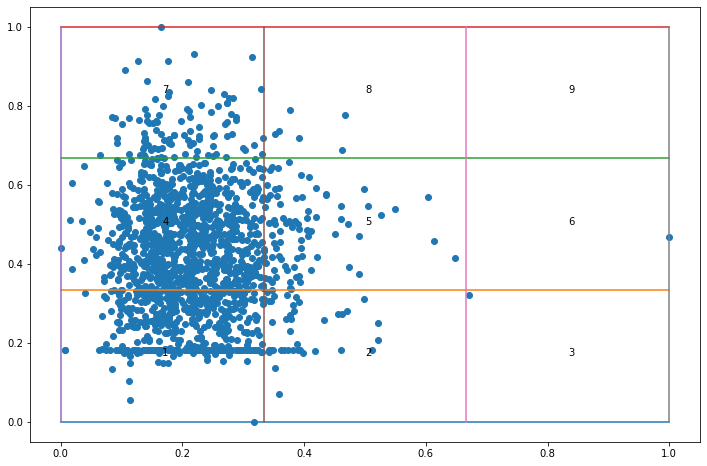

In [122]:
x  = np.linspace(0,1,100)
y  = np.linspace(0,1,100) 
plt.figure(figsize = (12,8))
plt.plot(x,[0 for i in range(100)])
plt.plot(x,[1/3 for i in range(100)])
plt.plot(x,[2/3 for i in range(100)])
plt.plot(x,[1 for i in range(100)])

plt.plot([0 for i in range(100)],y)
plt.plot([1/3 for i in range(100)],y)
plt.plot([2/3 for i in range(100)],y)
plt.plot([1 for i in range(100)],y)


plt.annotate('1',(1/6,1/6))
plt.annotate('4',(1/6,3/6))
plt.annotate('7',(1/6,5/6))
plt.annotate('2',(3/6,1/6))
plt.annotate('5',(3/6,3/6))
plt.annotate('8',(3/6,5/6))
plt.annotate('3',(5/6,1/6))
plt.annotate('6',(5/6,3/6))
plt.annotate('9',(5/6,5/6))

pc1_rotated,pc2_rotated = corrPC_Aire_Finesse(Re_500000,1.3,Plot=False)
#plt.scatter(pc1_rotated,pc2_rotated,c='k')

plt.scatter(normal_aire,normal_finesse)

Chaque zone etant définit par un vecteur label de dimension 9. Par exemple la zone 1 et 7 sont définis respectivement:
$$
L_{1} = \begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix} , \ \ \ L_{7} =  \begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
1 \\
0 \\
0 \\
\end{bmatrix}
$$

On écrit alors une fonction qui à partir du profils associe un label :

In [123]:
def label_profil(name,nom_profil,normal_1,normal_2):
    i = nom_profil.index(name)
    if normal_1[i] <= 1/3 : 
        if normal_2[i] < 1/3 : 
            label = 1
        elif normal_2[i] < 2/3 : 
            label = 2
        elif normal_2[i] <= 1 : 
            label = 3
    elif normal_1[i] <= 2/3 : 
        if normal_2[i] < 1/3 : 
            label = 4
        elif normal_2[i] < 2/3 : 
            label = 5
        elif normal_2[i] <= 1 : 
            label = 6
    elif normal_1[i] <= 1 : 
        if normal_2[i] < 1/3 : 
            label = 7
        elif normal_2[i] < 2/3 : 
            label = 8
        elif normal_2[i] <= 1 : 
            label = 9
    return label

aire  = Re['aire']
finesse =  Re['finesse']
nom_profils_Re = Re['nom']
normal_aire = list(normal(aire,min(aire),max(aire),0,1))
normal_finesse = list(normal(finesse,min(finesse),max(finesse),0,1))
label_profil('a18-il',nom_profils_Re,normal_aire,normal_finesse)

2

Ainsi, on peut alors associer à tous les profils une étiquette:

In [124]:
def label_profils(Re):
    label = []

    # Définition des listes de données d'aire et de finesse
    aire  = Re['aire']
    finesse =  Re['finesse']
    nom_profils_Re = Re['nom']
    normal_aire = list(normal(aire,min(aire),max(aire),0,1))
    normal_finesse = list(normal(finesse,min(finesse),max(finesse),0,1))
    for name in nom_profils_Re:
        label.append(label_profil(name,nom_profils_Re,normal_aire,normal_finesse))
    return label

label = label_profils(Re_1000000)